Import library

In [1]:
import pandas as pd
import numpy as nb 
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error,median_absolute_error,r2_score
import statsmodels.api as sm

Import data

In [2]:
data = pd.read_csv('Percentbodyfat.csv')
data.head()

,id,density,pcfat,age,weight,height,neck,chest,abdomen,hip,thigh,knee,ankle,bicepts,forearm,wrist
0,42,1.0250,32.9,44,205.00,69.50,36.6,106.0,104.3,115.5,70.6,42.5,23.7,33.6,28.7,17.4
1,74,1.0680,13.5,55,125.00,64.00,33.2,87.7,76.0,88.6,50.9,35.4,19.1,29.3,25.7,16.9
2,216,0.9950,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4
3,29,1.0910,3.7,27,133.25,64.75,36.4,93.5,73.9,88.5,50.1,34.5,21.3,30.5,27.9,17.2
4,36,1.0101,40.1,49,191.75,65.00,38.4,118.5,113.1,113.8,61.9,38.3,21.9,32.0,29.8,17.0


In [3]:
# Describe Data
data.describe()

,id,density,pcfat,age,weight,height,neck,chest,abdomen,hip,thigh,knee,ankle,bicepts,forearm,wrist
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,126.500000,1.055574,19.150794,44.884921,178.924405,70.307540,37.992063,100.824206,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762
std,72.890329,0.019031,8.368740,12.602040,29.389160,2.609583,2.430913,8.430476,10.783077,7.164058,5.249952,2.411805,1.694893,3.021274,2.020691,0.933585
min,1.000000,0.995000,0.000000,22.000000,118.500000,64.000000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000
25%,63.750000,1.041400,12.475000,35.750000,159.000000,68.250000,36.400000,94.350000,84.575000,95.500000,56.000000,36.975000,22.000000,30.200000,27.300000,17.600000
50%,126.500000,1.054900,19.200000,43.000000,176.500000,70.000000,38.000000,99.650000,90.950000,99.300000,59.000000,38.500000,22.800000,32.050000,28.700000,18.300000
75%,189.250000,1.070400,25.300000,54.000000,197.000000,72.250000,39.425000,105.375000,99.325000,103.525000,62.350000,39.925000,24.000000,34.325000,30.000000,18.800000
max,252.000000,1.108900,47.500000,81.000000,363.150000,77.750000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       252 non-null    int64  
 1   density  252 non-null    float64
 2   pcfat    252 non-null    float64
 3   age      252 non-null    int64  
 4   weight   252 non-null    float64
 5   height   252 non-null    float64
 6   neck     252 non-null    float64
 7   chest    252 non-null    float64
 8   abdomen  252 non-null    float64
 9   hip      252 non-null    float64
 10  thigh    252 non-null    float64
 11  knee     252 non-null    float64
 12  ankle    252 non-null    float64
 13  bicepts  252 non-null    float64
 14  forearm  252 non-null    float64
 15  wrist    252 non-null    float64
dtypes: float64(14), int64(2)
memory usage: 31.6 KB


In [5]:
# is there is null in data
data.isna().sum()

id         0
density    0
pcfat      0
age        0
weight     0
height     0
neck       0
chest      0
abdomen    0
hip        0
thigh      0
knee       0
ankle      0
bicepts    0
forearm    0
wrist      0
dtype: int64

/var/folders/l0/4vlfv_h14psdkdgqhr2v8sqw0000gn/T/ipykernel_15277/2974191460.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['age'])


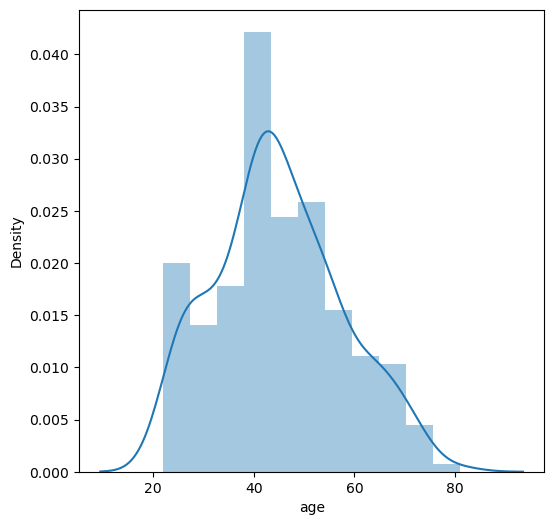

In [6]:
plt.figure(figsize=(6,6))
sns.distplot(data['age'])
plt.show()

/var/folders/l0/4vlfv_h14psdkdgqhr2v8sqw0000gn/T/ipykernel_15277/876690596.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['weight'])


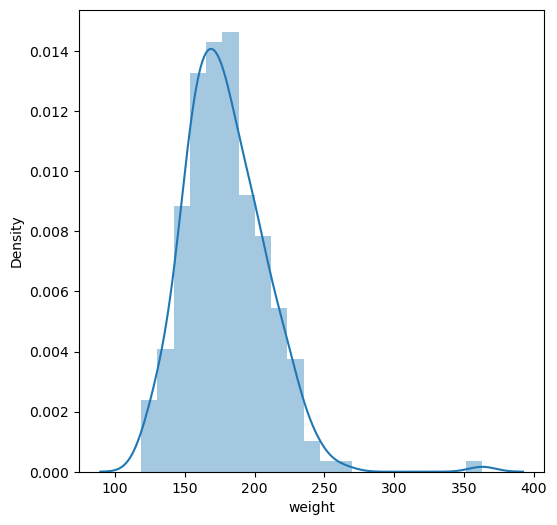

In [7]:
plt.figure(figsize=(6,6))
sns.distplot(data['weight'])
plt.show()

/var/folders/l0/4vlfv_h14psdkdgqhr2v8sqw0000gn/T/ipykernel_15277/2477639409.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['height'])


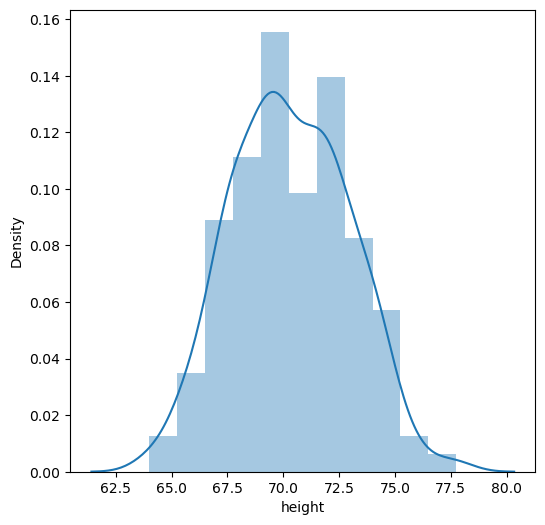

In [8]:
plt.figure(figsize=(6,6))
sns.distplot(data['height'])
plt.show()

In [9]:
y= data['density'].values
X= data.drop(['density','id'],axis=1).values
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,32.9,44.0,205.00,69.50,36.6,106.0,104.3,115.5,70.6,42.5,23.7,33.6,28.7,17.4
1,13.5,55.0,125.00,64.00,33.2,87.7,76.0,88.6,50.9,35.4,19.1,29.3,25.7,16.9
2,47.5,51.0,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4
3,3.7,27.0,133.25,64.75,36.4,93.5,73.9,88.5,50.1,34.5,21.3,30.5,27.9,17.2
4,40.1,49.0,191.75,65.00,38.4,118.5,113.1,113.8,61.9,38.3,21.9,32.0,29.8,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,17.3,43.0,194.00,75.50,38.5,110.1,88.7,102.1,57.5,40.0,24.8,35.1,30.7,19.2
248,7.8,27.0,216.00,76.00,39.4,103.6,90.9,107.7,66.2,39.2,25.9,37.2,30.2,19.0
249,38.1,42.0,244.25,76.00,41.8,115.2,113.7,112.4,68.5,45.0,25.5,37.1,31.2,19.9
250,10.3,23.0,188.15,77.50,38.0,96.6,85.3,102.5,59.1,37.6,23.2,31.8,29.7,18.3


In [10]:
names = data.columns.drop('density')
print(names)

Index(['id', 'pcfat', 'age', 'weight', 'height', 'neck', 'chest', 'abdomen',
       'hip', 'thigh', 'knee', 'ankle', 'bicepts', 'forearm', 'wrist'],
      dtype='object')


In [13]:
# splitting the dataset using train_test_split 
# train:test = 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 25)
X_train

array([[  6.3 ,  49.  , 152.75, ...,  38.5 ,  27.4 ,  18.5 ],
       [ 17.  ,  56.  , 167.75, ...,  32.4 ,  29.7 ,  19.  ],
       [ 15.  ,  53.  , 154.5 , ...,  28.5 ,  25.7 ,  17.1 ],
       ...,
       [ 16.5 ,  33.  , 211.75, ...,  37.1 ,  30.1 ,  18.2 ],
       [ 25.5 ,  42.  , 180.  , ...,  32.9 ,  29.8 ,  18.8 ],
       [  9.6 ,  47.  , 160.5 , ...,  31.4 ,  27.5 ,  17.7 ]])

Bulid The Model

In [14]:
lm = LinearRegression()
model = lm.fit(X_train, y_train)


In [15]:
# getting the predictions
y_pred = model.predict(X_test)
y_pred

array([1.08638271, 1.05194268, 1.03230821, 1.04033463, 1.06845769,
       1.0465925 , 1.00813882, 1.04249986, 1.04650115, 1.05744888,
       1.02366817, 1.06005794, 1.05071004, 1.07660581, 1.04144999,
       1.06167709, 1.0361552 , 1.05866397, 1.04839445, 1.09806765,
       1.08606785, 1.07638436, 1.06309125, 1.06139223, 1.0781717 ,
       1.05031603, 1.02489967, 1.07162963, 1.04521387, 1.05798009,
       1.05291673, 1.07840626, 1.01389515, 1.02597788, 1.08962427,
       1.07097541, 1.06888611, 1.04394153, 1.03346676, 1.07812178,
       1.06936262, 1.0486729 , 1.0855894 , 1.05436462, 1.05674071,
       1.07311124, 1.04603985, 1.07354346, 1.08346407, 1.07068148,
       1.08683868])

In [16]:
#The difference between the predictions value and the real value
df = pd.DataFrame({"y_test" : y_test, "y_pred" 
                : y_pred, "diff between y_pred and y_test" :abs(y_pred - y_test)})
df

,y_test,y_pred,diff between y_pred and y_test
0,1.0862,1.086383,0.000183
1,1.0520,1.051943,0.000057
2,1.0317,1.032308,0.000608
3,1.0404,1.040335,0.000065
4,1.0716,1.068458,0.003142
5,1.0472,1.046592,0.000608
6,1.0101,1.008139,0.001961
7,1.0422,1.042500,0.000300
8,1.0484,1.046501,0.001899
9,1.0568,1.057449,0.000649


In [17]:
from sklearn.metrics import mean_absolute_error
MSE =mean_absolute_error(y_test, y_pred)
MSE


0.001457700759159552

In [18]:
model.score(X_train, y_train)

0.9782307895448594

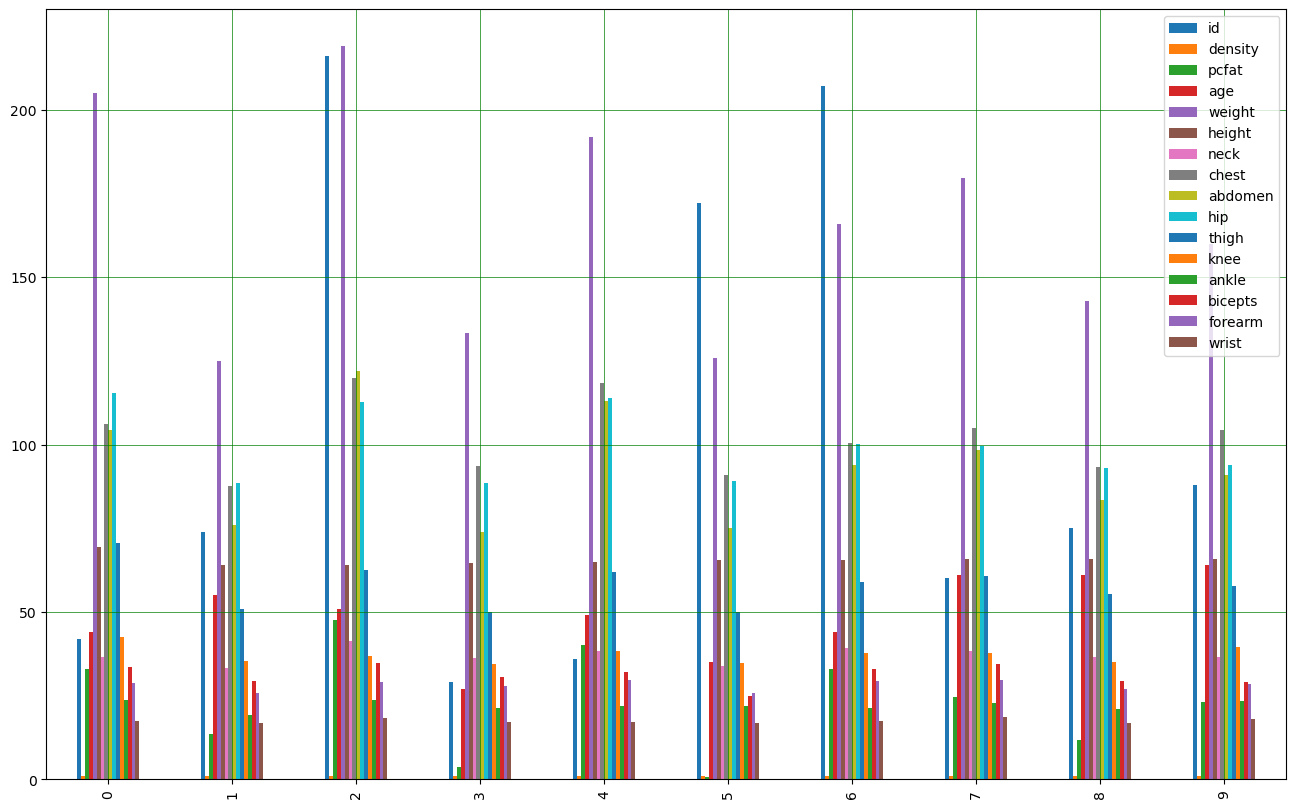

In [19]:
df1 = data.head(10)
df1.plot(kind="bar", figsize=(16,10))
plt.grid(which="major",linestyle="-", linewidth="0.5",color="green")

plt.show()

In [20]:
stmodel=sm.OLS(y,X).fit()
stmodel.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.013e+05
Date:                Mon, 27 May 2024   Prob (F-statistic):                        0.00
Time:                        10:57:44   Log-Likelihood:                          724.07
No. Observations:                 252   AIC:                                     -1420.
Df Residuals:                     238   BIC:                                     -1371.
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0024      0.000    -11.447      0.000      -0.003      -0.002
x2         -2.072e-05      0.000     -0.196      0.845      -0.000       0.000
x3            -0.0028   7.97e-05    -34.876      0.000      -0.003      -0.003
x4             0.0068      0.000     18.352      0.000       0.006       0.008
x5             0.0039      0.001      5.325      0.000       0.002       0.005
x6             0.0026      0.000      8.791      0.000       0.002       0.003
x7             0.0008      0.000      2.413      0.017       0.000       0.002
x8             0.0038      0.000      9.416      0.000       0.003       0.005
x9             0.0011      0.000      2.361      0.019       0.000       0.002
x10            0.0005      0.001      0.590      0.556      -0.001       0.002
x11            0.0019      0.001      2.729      0.007       0.001       0.003
x12            0.0010      0.001      1.715      0.088      -0.000       0.002
x13            0.0005      0.001      0.773      0.440      -0.001       0.002
x14            0.0043      0.002      2.421      0.016       0.001       0.008
==============================================================================
Omnibus:                       13.887   Durbin-Watson:                   1.685
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               35.041
Skew:                          -0.074   Prob(JB):                     2.46e-08
Kurtosis:                       4.821   Cond. No.                         567.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
print('mean_absolute_error is:',mean_absolute_error(y_test,y_pred))
print('mean_squared_error is:',mean_squared_error(y_test,y_pred))
print('median_absolute_error is:',median_absolute_error(y_test,y_pred))

mean_absolute_error is: 0.001457700759159552
mean_squared_error is: 1.158343052531131e-05
median_absolute_error is: 0.0007055544130227798
